In [632]:
%reload_ext autoreload
%autoreload 2

In [633]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.linalg as lin
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [995]:
def householder_constructor(vs):
    num_vs, v_dim = vs.shape
    I = torch.eye(v_dim, v_dim).double()
    P = I
    for i in range(num_vs):
        v = vs[i].view(-1, 1)
        # alpha = alphas[i]
        # P = (I - 2 * torch.sigmoid(alpha) * (v @ v.T) / (lin.vector_norm(v) ** 2)) @ P
        P = (I - 2 * (v @ v.T) / (lin.vector_norm(v) ** 2)) @ P
    return P

H = 1
Loss: 0.019413844641519615 | Grad norm: 1.1128503664162529e-06
Loss: 0.019409759012638098 | Grad norm: 5.637754221647031e-07
Loss: 0.019407989630863594 | Grad norm: 3.374304515987458e-07
Loss: 0.01940724760197972 | Grad norm: 1.9278524347013883e-07
Loss: 0.019406962887713236 | Grad norm: 1.1247896371842764e-07
Loss: 0.019406846517609603 | Grad norm: 6.909445851768076e-08
Loss: 0.019406793761581328 | Grad norm: 4.4518064748232294e-08
Loss: 0.01940676771966907 | Grad norm: 3.0167692490917205e-08
Loss: 0.019406753435660822 | Grad norm: 2.2348127369170985e-08
Loss: 0.01940674394029153 | Grad norm: 1.8990290725866002e-08
Loss: 0.01940673581503918 | Grad norm: 1.826674588198625e-08
Loss: 0.019406727367335844 | Grad norm: 1.8752879623326246e-08
Loss: 0.019406717709946827 | Grad norm: 1.9700350284128004e-08
Loss: 0.01940670628673798 | Grad norm: 2.0818297541903976e-08
Loss: 0.01940669264712352 | Grad norm: 2.20080360061684e-08
Loss: 0.019406676354956392 | Grad norm: 2.3227270504218937e-0

Loss: 3.526492683807328e-05 | Grad norm: 2.9154785665191594e-18
Loss: 3.526492683807324e-05 | Grad norm: 2.5100630208963836e-18
H = 99
Loss: 0.0004055554780389335 | Grad norm: 2.5833043077162603e-06
Loss: 0.0004007927153818642 | Grad norm: 3.0471921436060315e-07
Loss: 0.0004002587318707864 | Grad norm: 1.4467464122557966e-07
Loss: 0.0004000722528501125 | Grad norm: 7.991716297970618e-08
Loss: 0.0004000153792706242 | Grad norm: 3.5338417099619736e-08
Loss: 0.000400003639253397 | Grad norm: 1.4863997297619863e-08
Loss: 0.0004000011192681261 | Grad norm: 7.299246568068214e-09
Loss: 0.0004000003791310931 | Grad norm: 4.041948599727218e-09
Loss: 0.00040000012487760746 | Grad norm: 2.279927086809474e-09
Loss: 0.00040000003829626955 | Grad norm: 1.2534631433830993e-09
Loss: 0.00040000001077033256 | Grad norm: 6.622848827087148e-10
Loss: 0.00040000000275585085 | Grad norm: 3.3432598583518015e-10
Loss: 0.00040000000063767125 | Grad norm: 1.60633374014542e-10
Loss: 0.00040000000013269997 | Grad 

Loss: 0.00872860337172269 | Grad norm: 3.478282236629665e-17
Loss: 0.008728603371722692 | Grad norm: 1.2523886263195171e-18
Loss: 0.00872860337172269 | Grad norm: 4.501177260279872e-19
Loss: 0.00872860337172269 | Grad norm: 4.477884409022964e-19
Loss: 0.00872860337172269 | Grad norm: 4.650883754739698e-19
H = 50
Loss: 0.0036181075522575307 | Grad norm: 4.526878776970047e-06
Loss: 0.0035725828405720954 | Grad norm: 1.3657810080659185e-06
Loss: 0.0035652374204939784 | Grad norm: 3.8907491000991876e-07
Loss: 0.0035643871976438696 | Grad norm: 1.3056349135639455e-07
Loss: 0.0035642843873272684 | Grad norm: 3.652956830877182e-08
Loss: 0.0035642761341527786 | Grad norm: 8.301971888267124e-09
Loss: 0.0035642756999819574 | Grad norm: 1.529989574458382e-09
Loss: 0.003564275685045435 | Grad norm: 2.265523770539623e-10
Loss: 0.003564275684715023 | Grad norm: 2.6570393216247342e-11
Loss: 0.0035642756847104507 | Grad norm: 2.4200567057457438e-12
Loss: 0.003564275684710413 | Grad norm: 1.66672158278

Loss: 0.019724651032444383 | Grad norm: 5.718542742249771e-08
Loss: 0.019724584076218427 | Grad norm: 4.5942524359134006e-08
Loss: 0.01972453806520743 | Grad norm: 3.85049988597421e-08
Loss: 0.019724503240688404 | Grad norm: 3.41017390213944e-08
Loss: 0.01972447375087554 | Grad norm: 3.158122596316747e-08
Loss: 0.01972444662201612 | Grad norm: 2.994756801276321e-08
Loss: 0.019724420657748255 | Grad norm: 2.8571926457086152e-08
H = 5
Loss: 0.018176237040804896 | Grad norm: 2.6038258246477736e-06
Loss: 0.01814750358002594 | Grad norm: 1.1836007966523948e-06
Loss: 0.018140716277204025 | Grad norm: 6.03872030880859e-07
Loss: 0.018137113238041975 | Grad norm: 5.074568703279749e-07
Loss: 0.01813423659656727 | Grad norm: 3.855385950358207e-07
Loss: 0.018132534163611214 | Grad norm: 2.797972765330284e-07
Loss: 0.01813136318487712 | Grad norm: 2.581853590623028e-07
Loss: 0.01813011023614376 | Grad norm: 2.634534542761912e-07
Loss: 0.018128888584750896 | Grad norm: 2.2466976359118072e-07
Loss: 0

Loss: 1.425005158150573e-13 | Grad norm: 9.351000522787931e-11
Loss: 1.6507207952956916e-14 | Grad norm: 3.1820161670658985e-11
Loss: 1.6047823292687147e-15 | Grad norm: 9.919452040529622e-12
Loss: 1.2985332836401795e-16 | Grad norm: 2.821098679898519e-12
Loss: 8.663426504551385e-18 | Grad norm: 7.285284566507974e-13
Loss: 4.715010757656996e-19 | Grad norm: 1.6992234432779145e-13
Loss: 2.068128733879818e-20 | Grad norm: 3.557974357781493e-14
Loss: 7.211472060565793e-22 | Grad norm: 6.642452254179971e-15
Loss: 1.968171788798274e-23 | Grad norm: 1.0970804196071737e-15
H = 100
Loss: 0.00040225607945453164 | Grad norm: 2.4259728142552784e-06
Loss: 0.00040009845159798393 | Grad norm: 1.5218613060838028e-07
Loss: 0.00040000415652584396 | Grad norm: 3.1037802273975526e-08
Loss: 0.00040000007133028984 | Grad norm: 4.070027440509153e-09
Loss: 0.0004000000004819821 | Grad norm: 3.345327895574436e-10
Loss: 0.0004000000000011417 | Grad norm: 1.627685220765673e-11
Loss: 0.0004000000000000007 | Grad

Loss: 0.0033738974408045776 | Grad norm: 7.678413033246327e-19
Loss: 0.003373897440804577 | Grad norm: 7.027798834919731e-19
Loss: 0.0033738974408045776 | Grad norm: 6.966424041203212e-19
Loss: 0.0033738974408045763 | Grad norm: 7.436758415197175e-19
Loss: 0.0033738974408045763 | Grad norm: 7.563396670764384e-19
Loss: 0.0033738974408045763 | Grad norm: 7.604110898069445e-19
Loss: 0.0033738974408045763 | Grad norm: 7.87167316765139e-19
Loss: 0.0033738974408045763 | Grad norm: 7.831228837307818e-19
Loss: 0.0033738974408045763 | Grad norm: 8.169394366585435e-19
Loss: 0.0033738974408045776 | Grad norm: 8.328661224689407e-19
H = 70
Loss: 0.000850506697042832 | Grad norm: 5.377406939761672e-06
Loss: 0.0007848021383307797 | Grad norm: 1.647545284993157e-06
Loss: 0.000779380158564216 | Grad norm: 4.6636182183081897e-08
Loss: 0.000779374608130298 | Grad norm: 9.736058858443476e-10
Loss: 0.0007793746056097868 | Grad norm: 2.049924047317623e-12
Loss: 0.0007793746056097761 | Grad norm: 1.909983088

Loss: 0.018353296176846456 | Grad norm: 2.4991100372147665e-07
Loss: 0.01835259355129002 | Grad norm: 1.6310598372974996e-07
Loss: 0.018352233537121017 | Grad norm: 1.1496073629265138e-07
Loss: 0.018352026246505886 | Grad norm: 8.5876629206909e-08
Loss: 0.018351899851379423 | Grad norm: 6.481622441418795e-08
Loss: 0.018351823412584196 | Grad norm: 4.815687052356336e-08
Loss: 0.018351778962401186 | Grad norm: 3.496296121477259e-08
Loss: 0.01835175429131996 | Grad norm: 2.4808219645836318e-08
Loss: 0.018351741203287638 | Grad norm: 1.7232504067125207e-08
Loss: 0.018351734549556003 | Grad norm: 1.1731277771696629e-08
Loss: 0.018351731304049726 | Grad norm: 7.827861765684907e-09
Loss: 0.018351729785943925 | Grad norm: 5.1162565102902195e-09
Loss: 0.018351729106211828 | Grad norm: 3.2715694971561063e-09
Loss: 0.01835172881563758 | Grad norm: 2.0436594923050115e-09
H = 10
Loss: 0.016444490856924003 | Grad norm: 3.6646619881312715e-06
Loss: 0.016406850152308677 | Grad norm: 1.7971030429489085

Loss: 0.0004000115851846111 | Grad norm: 5.344827526127797e-08
Loss: 0.00040000017141672827 | Grad norm: 6.419388918742173e-09
Loss: 0.00040000000109786075 | Grad norm: 5.115665964832986e-10
Loss: 0.0004000000000024814 | Grad norm: 2.431586349217e-11
Loss: 0.0004000000000000013 | Grad norm: 5.967001123799897e-13
Loss: 0.00039999999999999986 | Grad norm: 5.330741926442651e-15
Loss: 0.0003999999999999998 | Grad norm: 9.746846487279703e-18
Loss: 0.0004 | Grad norm: 2.3433904743577394e-18
Loss: 0.0004 | Grad norm: 2.5002213066185197e-18
Loss: 0.0003999999999999999 | Grad norm: 2.5370819072965598e-18
Loss: 0.0003999999999999997 | Grad norm: 2.5617698615709446e-18
Loss: 0.00039999999999999996 | Grad norm: 2.602112516566858e-18
Loss: 0.00039999999999999986 | Grad norm: 2.821937027091732e-18
Loss: 0.0004000000000000002 | Grad norm: 2.9224947546599835e-18
Loss: 0.0003999999999999998 | Grad norm: 3.109724998938736e-18
Loss: 0.0004 | Grad norm: 3.2038664935751337e-18
Loss: 0.0003999999999999999 |

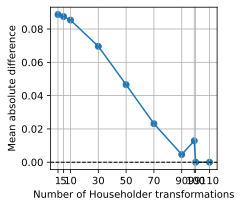

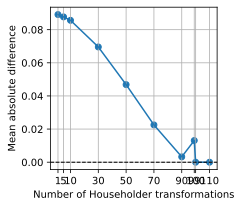

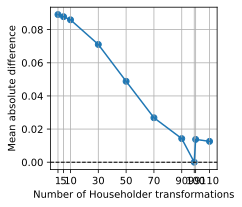

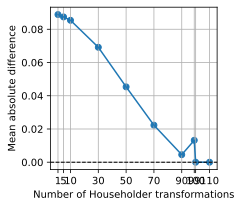

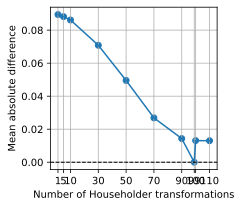

In [1002]:
seeds = [10, 20, 30, 40, 50]

for seed in seeds:
    
    np.random.seed(seed)
    torch.manual_seed(seed)

    D = 100
    target = ortho_group.rvs(D)  # generate random orthogonal matrix
    target = torch.from_numpy(target)
    
    Hs = [1, 5, 10, 30, 50, 70, 90, 99, 100, 110]
    
    mean_abs_diffs = []

    for H in Hs:

        print(f"H = {H}")

        vs = nn.Parameter((torch.randn(H, D)).double())
        # alphas = nn.Parameter((torch.zeros(H, )).double())
        opt = optim.Adam([vs], lr=1e-1)

        for j in range(1, 2000):

            Q = householder_constructor(vs)
            loss = torch.mean((Q - target) ** 2)
            opt.zero_grad()
            loss.backward()

            if j % 100 == 0:
                print(f"Loss: {float(loss)} | Grad norm: {torch.linalg.norm(vs.grad)}")

            opt.step()

        Q = householder_constructor(vs)
        mean_abs_diff = torch.mean(torch.abs(Q - target))  # a more intuitive metric
        mean_abs_diffs.append(float(mean_abs_diff))
        
    plt.figure(figsize=(3, 3))
    plt.plot(Hs, mean_abs_diffs)
    plt.scatter(Hs, mean_abs_diffs)
    plt.axhline(0, linestyle="--", color="black", linewidth=1)
    plt.grid()
    plt.ylabel("Mean absolute difference")
    plt.xlabel("Number of Householder transformations")
    plt.xticks(Hs)
    plt.savefig(f"householder_100by100_seed{seed}.png", dpi=300, bbox_inches='tight')